# 1. Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing # processing.scale // for scaling continuous variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 2. Check Data

In [8]:
# Loading the dataset
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')

# Replace special 
ASD_data.columns=ASD_data.columns.str.replace('-','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
ASD_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits_
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [9]:
Sex = pd.Categorical(pd.Categorical(ASD_data['Sex']).codes)
Ethnicity = pd.Categorical(pd.Categorical(ASD_data['Ethnicity']).codes)
Jaundice = pd.Categorical(pd.Categorical(ASD_data['Jaundice']).codes)
Family_mem_with_ASD = pd.Categorical(pd.Categorical(ASD_data['Family_mem_with_ASD']).codes)
Class_ASD_Traits_ = pd.Categorical(pd.Categorical(ASD_data['Class_ASD_Traits_']).codes)

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_
ASD_data['Age_Mons'] = (ASD_data['Age_Mons'] - min(ASD_data['Age_Mons'])) / (max(ASD_data['Age_Mons']) - min(ASD_data['Age_Mons']))

# one-hot to multi-values categorical variable
oh_data = pd.get_dummies(ASD_data[["Ethnicity"]])
ASD_data = ASD_data.join(oh_data)

# drop useless variables
X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_', 'Ethnicity'], axis=1)
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8,Ethnicity_9,Ethnicity_10
0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1050,0,0,1,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1051,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1052,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


## 3.2 Choose target

In [10]:
Y_classification = ASD_data.Class_ASD_Traits_

# 4. Build KNN Model

## 4.1 Split the dataset into training set and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 5, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(843, 25)
(211, 25)


## 4.2 Build KNN Model (k=?)

In [12]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.975
Score in test set: 0.938


## 4.3. Use grid search to optimize the parameters

In [13]:
test_scores = []
train_scores = []

# Grid search and find the optimal parameter (N neighborhoods)
for i in range(2, 20):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)

    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))

# Print the best model index
max_train_score = max(train_scores)
print('The best k (train score) is', train_scores.index(max_train_score)+2)

max_test_score = max(test_scores)
print('The best k (test  score) is', test_scores.index(max_test_score)+2)

The best k (train score) is 15
The best k (test  score) is 15


In [14]:
knn_classifier=KNeighborsClassifier(n_neighbors=3) # k = 3
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.972
Score in test set: 0.929


In [15]:
knn_classifier=KNeighborsClassifier(n_neighbors=17) # k = 17
knn_classifier.fit(X_train, y_train)

print('Score in training set: {:.3f}'.format(knn_classifier.score(X_train, y_train)))
print('Score in test set: {:.3f}'.format(knn_classifier.score(X_test, y_test)))

Score in training set: 0.974
Score in test set: 0.962


# 5. Visualize the performance

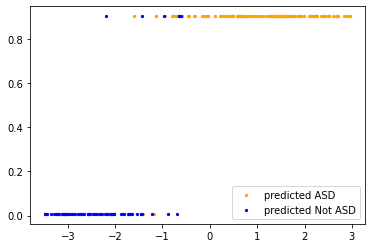

In [16]:
# Visualize the result of KNN with LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_new = lda.fit_transform(X_test, y_test)

y_test_new = y_test.apply(lambda x:x + np.random.uniform(-0.1,0.1))

plt.scatter(X_new[knn_classifier.predict(X_test) == 1], y_test_new[knn_classifier.predict(X_test) == 1], marker='o', c='orange', s=5)
plt.scatter(X_new[knn_classifier.predict(X_test) == 0], y_test_new[knn_classifier.predict(X_test) == 0], marker='o', c='blue', s=5)

plt.legend(['predicted ASD', 'predicted Not ASD'], loc='best')
plt.show()

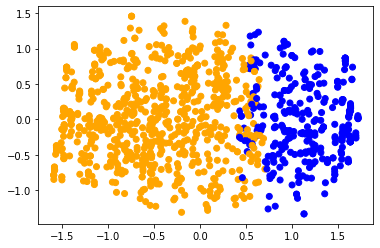

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
color = []
for y in Y_classification:
    color.append('orange' if y == 1 else 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=color) # Orange: ASD; Blue Not ASD;
plt.show()
